In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [8]:

runs = {'control' :                    './models/filterFrance/Z64/yrs100/control/'
        #,'0.01 weight ZG' :            './models/filterFrance/Z64/yrs100/fw2..01.2/'
        #,'0 weight ZG' :               './models/filterFrance/Z64/yrs100/fw2.0.2/'              
        #,'0.1 weight ZG' :             './models/filterFrance/Z64/yrs100/fw2..1.2/'
        #,'20 weight TM SM' :            './models/filterFrance/Z64/yrs100/fw20.1.20/'
        #,'0.5 K-L and 0.5 rec':         './models/filterFrance/Z64/yrs100/k.5.5/'
        #,'4 layers':                   './models/filterFrance/Z64/yrs100/lrs4/'
        #,'0.01 K-L and 0.99 rec' :     './models/filterFrance/Z64/yrs100/k.99.01/'
        #,'2 skip' :                    './models/filterFrance/Z64/yrs100/skip2/'
        #,'no dropout/btchnorm' :       './models/filterFrance/Z64/yrs100/nodrpbnrml/'
        #,'decoder without mask' :      './models/filterFrance/Z64/yrs100/nomask/'
        #,'no filters' :                './models/nofilter/Z64/yrs100/nomask/'
        #,'Z8'   :                       './models/filterFrance/Z8/yrs100/control/'
        #,'Z8/0.1 weight ZG' :          './models/filterFrance/Z8/yrs100/fw2..1.2/'     
        #,'Z8/20 weight TM SM' :         './models/filterFrance/Z8/yrs100/fw20.1.20/'
        #,'Z2' :                        './models/filterFrance/Z2/yrs100/control/'
        #,'Z2/0.1 weight ZG' :          './models/filterFrance/Z2/yrs100/fw2..1.2/'
        #,'Z8/ 800 yrs/ control' :      './models/filterFrance/Z8/yrs800/control/'
        #,'Z8/800 yrs/0.1 weight ZG' :  './models/filterFrance/Z8/yrs800/fw20.1.20/'
        #,'500 yrs/ control' :           './models/filterFrance/Z64/yrs500/control/'
        ,'yrs500/fw20.1.20' :   './models/filterFrance/Z64/yrs500/fw20.1.20/'
        ,'yrs500/Z8' :                 './models/filterFrance/Z8/yrs500/control/'
        ,'yrs500/Z8/fw20.1.20' : './models/filterFrance/Z8/yrs500/fw20.1.20/'
        ,'yrs500/Z8/4 layers'  :      './models/filterFrance/Z8/yrs500/fw20.1.20lrs4/'
        ,'yrs500/Z8/fw0.1.0' :  './models/filterFrance/Z8/yrs500/fw0.1.0/'
        ,'yrs500/Z8/fw20.1.20btch1024':'./models/filterFrance/Z8/yrs500/fw20.1.20btch1024/'
        ,'yrs500/Z8/fw20.1.20kip2' :  './models/filterFrance/Z8/yrs500/fw20.1.20skip2/'
        ,'yrs500/Z8/fw40.1.40' :     './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'yrs500/Z4/fw20.1.20btch256' : './models/filterFrance/Z4/yrs500/fw20.1.20btch256/'
        ,'yrs500/Z4/fw0.1.0btch256' : './models/filterFrance/Z4/yrs500/fw0.1.0btch256/'
        ,'yrs500/fw0.1.0btch256' : './models/filterFrance/Z64/yrs500/fw0.1.0btch256/'
        ,'yrs500/fw40.1.40btch256' : './models/filterFrance/Z64/yrs500/fw40.1.40lrs4btch256/'
        ,'yrs500/nomaskfw40.1.40btch256' : './models/nofilter/Z64/yrs500/nomaskfw40.1.40btch256/'
        ,'NAonlyfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'Z8/NAfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256/'
        ,'Z8/NAfw20.1.20btch256out.1' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256in1out.1/'
        ,'yrs500/Z8/NAfw0.1.0btch256' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw0.1.0btch256/'
        ,'yrs500/Z8/NAfw20.1.20btch256out.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256in1out.1/'
        ,'yrs500/Z8/NAfw20.1.20btch256' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256/'
        ,'NA/Z8/yrs500/fw5.15c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5btch256coef1..1/'
        ,'NA/Z8/yrs500/fw10.1.10c1..5' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..5/'
        ,'NA/Z8/yrs500/fw10.1.10c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1/'
        ,'NA/Z64/yrs500/fw20.1.20c1..1' : './models/filterFranceNorthAtlantic/Z64/yrs500/fw20.1.20btch256coef1..1/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c0' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class0/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c10' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class10/'    
        ,'NA/Z8/yrs500/fw10.1.10c1..1c10' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class10/' 
        ,'NA/Z8/yrs100/fw10.1.10c1..1c1' : './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class1/'
        ,'NA/Z8/yrs500/fw10.1.10c1..1c1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class1/'
        ,'NA/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1/'
        ,'NA/Z8/yrs5000/fw20.1.20c1..1class0' : './models/filterFranceNorthAtlantic/Z8/yrs5000/fw20.1.20c1..1class0/'
        ,'NA/Z64/yrs5000/fw20.1.20c1..1class0' : './models/filterFranceNorthAtlantic/Z64/yrs5000/fw20.1.20c1..1class0/'
        ,'NA/Z8/yrs500/fw5.1.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5c1..1C.1/'
        ,'Z8/yrs500/fw5.1.5k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw5.1.5k5.5skip2C.1/'
        ,'Z8/yrs500/fw20.1.20k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw20.1.20k.5.5skip2C.1/'
}

In [3]:
runs = { 'control' :                            './models/filterFrance/Z64/yrs100/control/'
        ,'NA/Z64/fw20.1.20' :                   './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'Z8/NAfw20.1.20' :                     './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256/'
        ,'Z8/yrs500/fw40.1.40' :                './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'Z8/yrs500/fw40.1.40' :                './models/filterFrance/Z8/yrs500/fw40.1.40/'
        ,'NA/Z64/fw20.1.20' :                   './models/filterFranceNorthAtlantic/Z64/yrs100/fw20.1.20btch256/'
        ,'NA/Z8/fw20.1.20c1..1' :               './models/filterFranceNorthAtlantic/Z8/yrs100/fw20.1.20btch256in1out.1/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c0' :      './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class0/'
        ,'NA/Z8/yrs100/fw10.1.10c1..1c10' :     './models/filterFranceNorthAtlantic/Z8/yrs100/fw10.1.10btch256coef1..1class10/'     
        }


In [12]:
runs = { 'Z64/yrs500/fw20.1.20' :   './models/filterFrance/Z64/yrs500/fw20.1.20/'
         ,'Z8/yrs5000/fw20.1.20' :   './models/filterFrance/Z8/yrs500/fw20.1.20/'
        #,'Z8/yrs500/fw20.1.20' : './models/filterFrance/Z8/yrs500/fw20.1.20/'
        ,'NA/Z64/yrs500/fw20.1.20c1..1' : './models/filterFranceNorthAtlantic/Z64/yrs500/fw20.1.20btch256coef1..1/'
        #,'NA/Z8/yrs500/fw20.1.20c1..0' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256/'
        ,'NA/Z8/yrs500/fw20.1.20c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256in1out.1/'
        #,'NA/Z8/yrs500/fw10.1.10c1..1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1/'
        #,'NA/Z8/yrs500/fw10.1.10c1..1c10' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class10/'
        #,'NA/Z8/yrs500/fw10.1.10c1..1c1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw10.1.10btch256coef1..1class1/'
        ,'NA/Z8/yrs500/fw20.1.20c1..1c0' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20btch256c1..0class0/'
        ,'NA/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw20.1.20kl.5.5c1..1C.1/'
        ,'NA/Z8/yrs500/fw5.1.5c1..1C.1' : './models/filterFranceNorthAtlantic/Z8/yrs500/fw5.1.5c1..1C.1/'
        ,'Z8/yrs500/fw5.1.5k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw5.1.5k5.5skip2C.1/'
        ,'Z8/yrs500/fw20.1.20k5.5skip2C.1' : './models/filterFrance/Z8/yrs500/fw20.1.20k.5.5skip2C.1/'
        }

/tmp/ipykernel_716617/2237002451.py:24: RuntimeWarning: invalid value encountered in multiply
  ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
/tmp/ipykernel_716617/2237002451.py:24: RuntimeWarning: invalid value encountered in multiply
  ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')


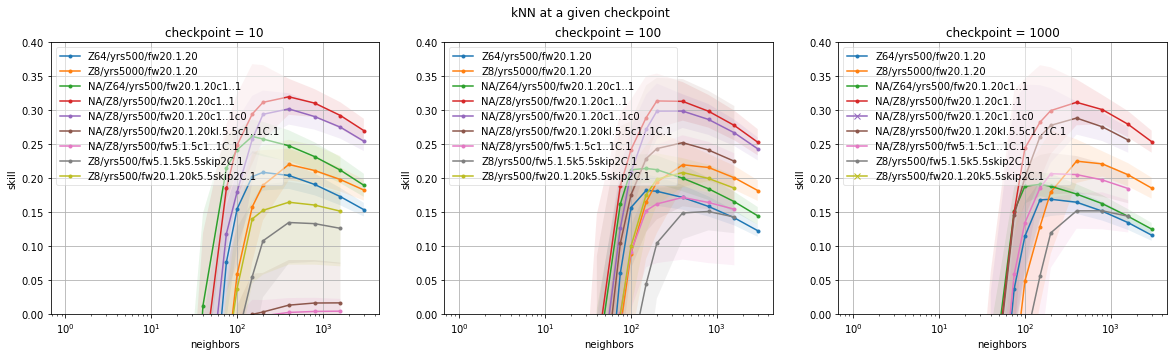

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [13]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('kNN at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([10,100,1000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            if 'kNN_uni' in  score.method.values:
                meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
                stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2))
                maxiter=100
                ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
                ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
            else:
                ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
                
        else: # the idea is to keep the colormap despite not having the line
            ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
    ax1.set_xlabel('neighbors')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.4])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
fig.savefig('./Images/class_KNN.png',dpi=200)

In [9]:
score.groupby(['checkpoint', 'C','method']).mean().loc[1000,slice(None),'Log_L2']

fold  Unnamed: 3   entropy     skill
checkpoint C        method                                      
1000       0.1      Log_L2   4.5         0.0  0.165225  0.167694
           0.5      Log_L2   4.5         1.0  0.165255  0.167547
           1.0      Log_L2   4.5         2.0  0.165263  0.167507
           10.0     Log_L2   4.5         3.0  0.165271  0.167466
           100.0    Log_L2   4.5         4.0  0.165272  0.167462
           1000.0   Log_L2   4.5         5.0  0.165272  0.167461
           100000.0 Log_L2   4.5         6.0  0.165272  0.167461

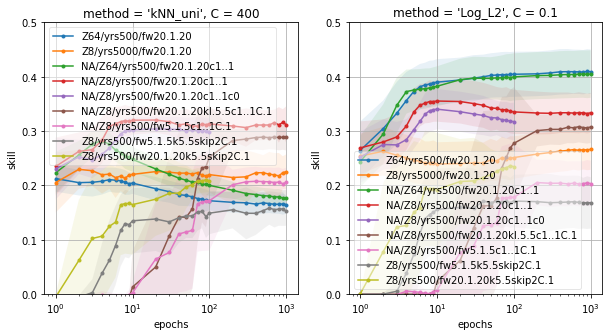

In [14]:
fig = plt.figure()
fig.set_size_inches(10, 5)
fig.suptitle('')

axs = fig.subplots(nrows=1, ncols=2)

for i, (C, method) in enumerate(zip([400,0.1],['kNN_uni', 'Log_L2'])):
    ax1 = axs[i]
    for name, folder in runs.items():
        #print(name)
        
        score = pd.read_csv(f'{folder}score.csv') 
        if method in  score.method.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2))
            maxiter=100
            ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            ax1.plot(np.arange(0,2),np.inf*np.arange(0,2),label=name, marker='x')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{method = }, {C = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
    fig.savefig('./Images/class_epochs.png',dpi=200)

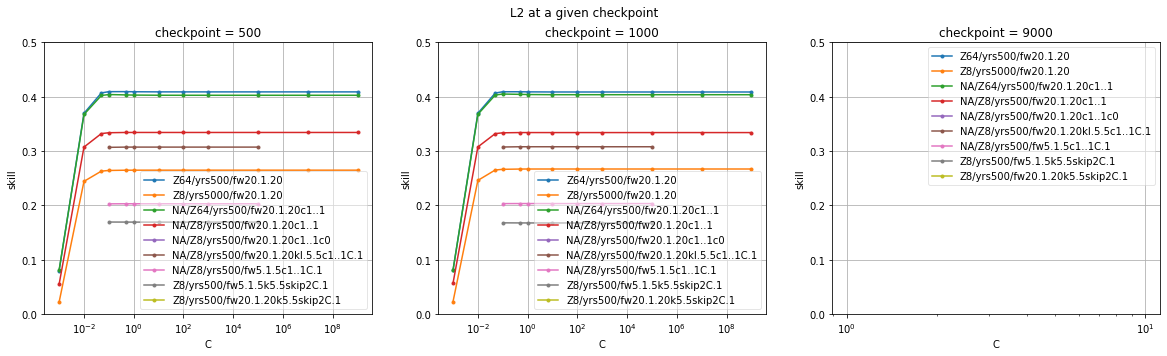

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [15]:
fig = plt.figure()
fig.set_size_inches(20, 5)
fig.suptitle('L2 at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([500,1000,9000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in runs.items():
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2))
            maxiter=100
            #ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='.')
    ax1.set_xlabel('C')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.5])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best', fancybox=True, framealpha=0.5)
    ax1.grid(True)
fig.savefig('./Images/class_L2.png',dpi=200)